In [1]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 3.1.5 (original - Physical Units)

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/11/19
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns

plt.rcParams.update({'font.size': 18})

In [2]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; m=9.110e-31; eps=8.854e-12; q=1.602e-19;

In [3]:
#Lattice
Rmax = 1.5e-9
NR = 750
dR = Rmax/NR
print('Rmax = %g; NR = %d; dR = %g' % (Rmax,NR,dR))
#R = dr*np.linspace(1,Nr)
R = dR*np.arange(1,NR+1)
#R = np.arange(dR,Rmax+dr,dR)
#print(R)

Rmax = 1.5e-09; NR = 750; dR = 2e-12


In [4]:
#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
t0 = (hbar**2)/(2*m*(dR**2))/q
T = 2*t0*np.eye(NR) - t0*np.eye(NR,k=1) - t0*np.eye(NR,k=-1)
UN = (-2*q/(4*np.pi*eps))/R; # Z=2 for Helium

In [10]:
Uscf = np.zeros(NR)
maxit = 100
tol = 1e-3
iter = 1
Eold = 0
converged = False

while iter < maxit and not converged:
    # "eigh" => eigenvalues W in ascending order & normalized eigenvector
    D,V = LA.eigh(T + np.diag(UN + Uscf)) 
#    print(D.shape)
#    print(D)
    Enew = D[0]
    psi = V[:,0]
    P = psi*np.conj(psi)
#    print(P.shape)
#    print(P)
#    print(sum(P))
#    print(np.cumsum(P))
#    input()
    Unew = (q/(4*np.pi*eps)) * ((np.cumsum(P)/R) + (sum(P/R)-np.cumsum(P/R)))
    
    change = abs(Enew - Eold)
    if(change < tol): converged = True
    print('iter = %d: E = %.3f eV, change = %.3e ... %s' % (iter, Enew, change, converged))
    Uscf = 0.9*Unew + 0.1*Uscf
    Eold = Enew
    iter += 1

iter = 1: E = -54.289 eV, change = 5.429e+01 ... False
iter = 2: E = -25.241 eV, change = 2.905e+01 ... False
iter = 3: E = -25.260 eV, change = 1.901e-02 ... False
iter = 4: E = -24.884 eV, change = 3.763e-01 ... False
iter = 5: E = -24.911 eV, change = 2.746e-02 ... False
iter = 6: E = -24.903 eV, change = 7.772e-03 ... False
iter = 7: E = -24.904 eV, change = 9.775e-04 ... True


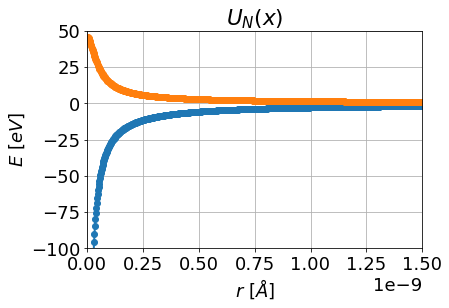

0.9999999999999982
0.9999998645470182


(0.0, 1.5e-09)

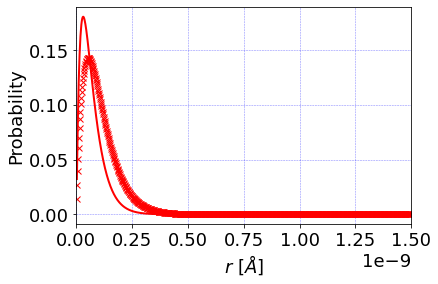

In [11]:
#plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(R, UN, linewidth=2, linestyle='-', marker='o')
plt.plot(R, Uscf, linewidth=2, linestyle='-', marker='o')
plt.xlabel('$r \ [\AA]$')
plt.ylabel('$E \ [eV]$')
plt.title('$U_N(x)$')
plt.grid(True)
plt.xlim(0,Rmax)
plt.ylim(-100,50)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
plt.show()

#analytical solutions for 1s hydrogen
a0 = 4*np.pi*eps*hbar**2/(m*q**2)
P0 = 4*dR/(a0**3) * R**2 * np.exp(-2*R/a0)

print(sum(P))
print(sum(P0))

plt.plot(R,np.sqrt(P),'r',lw=2)
plt.plot(R,np.sqrt(P0),'rx',lw=2)
plt.xlabel('$r \ [\AA]$')
plt.ylabel('Probability')
plt.grid(color='b', alpha=0.5, ls='--',lw=0.5)
plt.xlim(0,Rmax)
#plt.ylim(0,1)
#tick_params(axis='both',which='major',labelsize=15,direction='in')
#xticks(arange(0.2e-9,1.2e-9,0.2e-9),fontsize=15)
#text(0.1e-9,0.07,'Helium',fontsize=15)
#text(0.15e-9,0.03,'Hydrogen',fontsize=15)

0.9999999999999982
0.9999998645470182


(0.0, 1.5e-09)

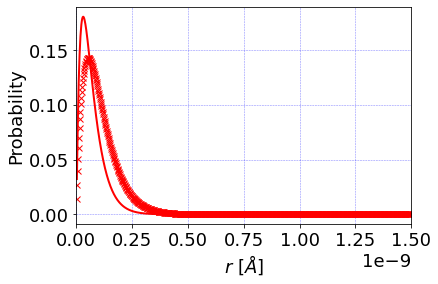

In [30]:
max_iter = 100
E_tol = 1e-3
Uscf = np.zeros(Nx)
iter = 1
change = 1

for iter in range(max_iter):
    [D,V] = LA.eigh(T + np.diag(UN + Uscf))
    DD = np.sort(D)
    ind = np.arange(0,len(T))
    E = D[ind[0]] 
    psi = V[:,ind[0]]
    P = psi*np.conj(psi)
    P = np.transpose(P);
    print(P)
    Unew = (q/(4*np.pi*epsil))*((sum(P/R)-np.cumsum(P/R))+(np.cumsum(P)/R));
    change = sum(abs(Unew-Uscf))/Nx
    print('iter = %d: E = %.3f eV, dq = %.3e' % (iter, E, change))
    Uscf = Unew

      # convergence
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break
else:
    print("not converged")
    
plt.plot(R, UN)

NameError: name 'Nx' is not defined